In [601]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [553]:
# So for the plot x-axis is input width, y-axis is normalized bump amplitude, and points are the regime

#change to your directory
dir = '/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src'
file_name = '/d120.txt' #change to yours
header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp'] #from their code
df = pd.read_csv(dir + file_name, delimiter=' ', header=None, names=header)  # space seperated
df['normalized_bump_amplitude'] = df.iloc[:, 1]/df.iloc[:, 0] # Im pretty sure this is the right thing to do here.
bump_width = df['width'].to_numpy() #nice to isolate

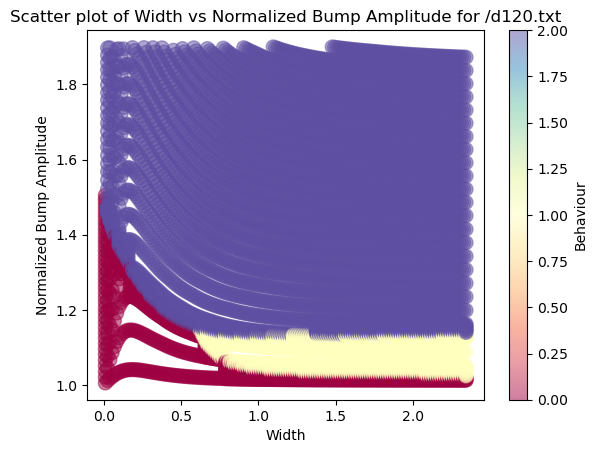

In [556]:
filtered_df = df[df['normalized_bump_amplitude'] <= 1.9] #this is different for the models - check the paper
filtered_df

plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], s=100, alpha=0.5, cmap='Spectral')
plt.colorbar(label='Behaviour')
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.show()

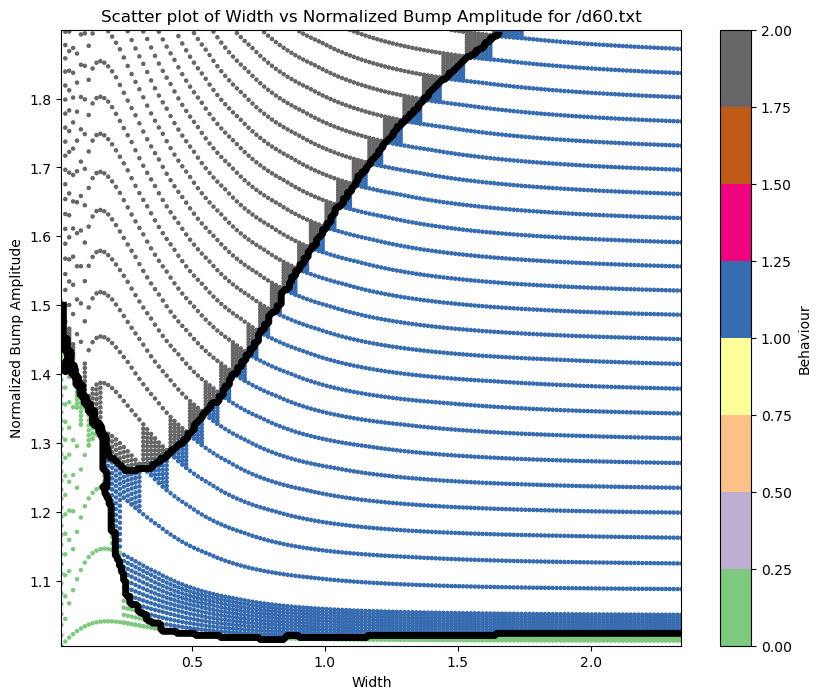

In [ ]:
# Create a 2D histogram or grid for contour plotting
x = filtered_df['width'].to_numpy()
y = filtered_df['normalized_bump_amplitude'].to_numpy()
z = filtered_df['behaviour'].to_numpy()

#Interpolation grid
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                       s=5, alpha=1, cmap='Accent')
plt.colorbar(scatter, label='Behaviour')

# Add contour lines
colours = ['black', 'black', 'black']
contour = plt.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=5)

# Labels and title
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.show()